In [1]:
import pandas as pd

#### 전체 문제 분석

1. 데이터 전체 기간에서 테러 숫자 연도별 집계 및 시각화 (+ 세계적 이슈 추측)
   - 테러 숫자, 연도
2. 테러가 많이 일어난 국가 정렬, 상위 10위 국가 시각화
   - 테러 숫자, 국가
3. 2번 국가의 사망자, 부상자 수 구분 및 시각화
   - 테러 횟수, 국가, 사망자 수, 부상자 수
4. 중동/북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아로 지역 구분 및 특성 확인
   - 테러 공격 형태, 사망자 수, 사상자 수
5. 1번 시기 기준 분리 테러 양상 분석
6. 70, 80, 90, 00, 10년대로 구분하여 특성 분석
7. 우리나라 테러 집계 및 시각화 분석
8. 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터 분석 및 시각화

* 필요한 정보
  - 테러 숫자, 연도, 국가, 테러 형태, 사망자 수, 부상자 수

* 데이터셋 컬럼 중 살릴 정보
  - iyear, imonth, iday, country, country_txt, region, region_txt, attacktype1, attacktyp1_txt
  - targtype1, targtype1_txt, targsubtype1_txt, nkill, nwound

#### 문제 1. 데이터 전체 기간 테러 숫자를 연도별 집계, 시각화 & 급격한 증가 시점 특정 짓고 세계적 이슈 추측

In [2]:
df = pd.read_csv('./globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_6572\1231289966.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
# 데이터 다루기 편하도록 필요한 컬럼만 뽑기

df_test = df[['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'attacktype1', 'attacktype1_txt',
              'nkill', 'nwound', 'targtype1', 'targtype1_txt', 'targsubtype1_txt']]
df_test.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,attacktype1,attacktype1_txt,nkill,nwound,targtype1,targtype1_txt,targsubtype1_txt
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,1,Assassination,1.0,0.0,14,Private Citizens & Property,Named Civilian
1,1970,0,0,130,Mexico,1,North America,6,Hostage Taking (Kidnapping),0.0,0.0,7,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,160,Philippines,5,Southeast Asia,1,Assassination,1.0,0.0,10,Journalists & Media,Radio Journalist/Staff/Facility
3,1970,1,0,78,Greece,8,Western Europe,3,Bombing/Explosion,NaN,NaN,7,Government (Diplomatic),Embassy/Consulate
4,1970,1,0,101,Japan,4,East Asia,7,Facility/Infrastructure Attack,NaN,NaN,7,Government (Diplomatic),Embassy/Consulate


In [4]:
# groupby 활용하여 데이터 그룹화하기

df_problem1 = df_test.groupby(['iyear']).count()
df_problem1.head()

,imonth,iday,country,country_txt,region,region_txt,attacktype1,attacktype1_txt,nkill,nwound,targtype1,targtype1_txt,targsubtype1_txt
iyear,,,,,,,,,,,,,
1970,651,651,651,651,651,651,651,651,609,599,651,651,632
1971,471,471,471,471,471,471,471,471,407,326,471,471,445
1972,568,568,568,568,568,568,568,568,524,241,568,568,552
1973,473,473,473,473,473,473,473,473,424,244,473,473,461
1974,581,581,581,581,581,581,581,581,523,352,581,581,558


In [49]:
# imonth 만 살리고, 나머지 컬럼 제거, 시각화 준비

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

plt.rcParams["font.family"] = "Malgun Gothic"

df_problem1 = df_problem1[['imonth']]
df_problem1.head()

,imonth
iyear,
1970,651
1971,471
1972,568
1973,473
1974,581


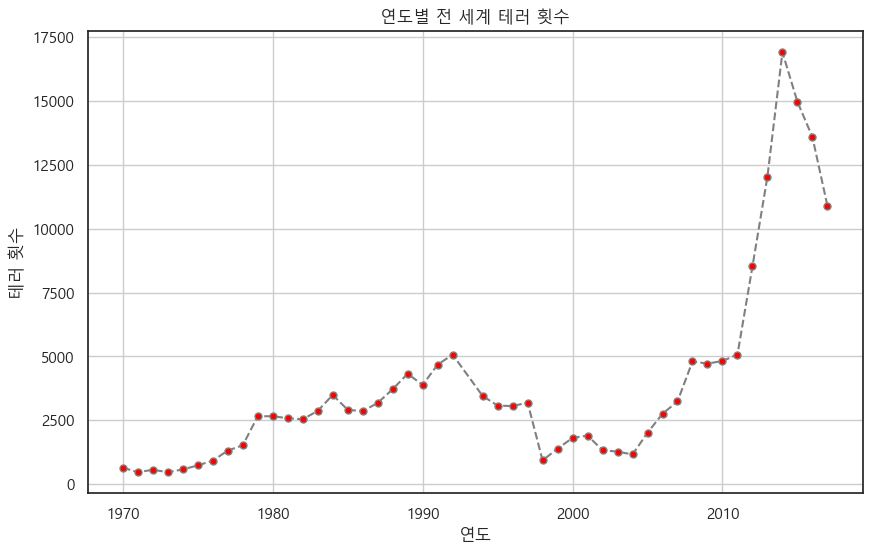

In [6]:
# 문제 1번 시각화

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='white')
plt.figure(figsize=(10,6))
plt.plot(df_problem1.index, df_problem1['imonth'], color = 'gray', linestyle = 'dashed', marker='o', markerfacecolor = 'red', markersize = '5')
plt.xlabel('연도')
plt.ylabel('테러 횟수')
plt.title('연도별 전 세계 테러 횟수')
plt.grid()
plt.show()


##### a. 작은 폭의 증가
   - 1978 >> 1979 년도 (이후 점진적인 증가를 보임)
   - 2004 >> 2011 년도 점진적인 증가

##### b. 큰 폭의 증가
   - 2011 >> 2014 년도

##### c. 이슈 추측
   - 통신매체 발달로 인한 순수 보고량 증가 (소셜미디어, 스마트폰 등)
   - 2011년 5월 오사마 빈 라덴 사살로 인한 탈레반 테러 증가

#### 문제 2. 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화

In [7]:
# groupby 활용하여 데이터 그룹화 > 순서대로 정렬 > 10개로 제한

df_problem2_count = df_test.groupby(['country_txt']).count()
df_problem2 = df_problem2_count[['imonth']].sort_values('imonth', ascending=False).iloc[:10]
df_problem2.sort_values('imonth', ascending=True, inplace=True)  # 밑에 바그래프에서 순서대로 보이게 하기 위해 재 정렬
df_problem2

,imonth
country_txt,
Turkey,4292
United Kingdom,5235
El Salvador,5320
Peru,6096
Philippines,6908
Colombia,8306
India,11960
Afghanistan,12731
Pakistan,14368


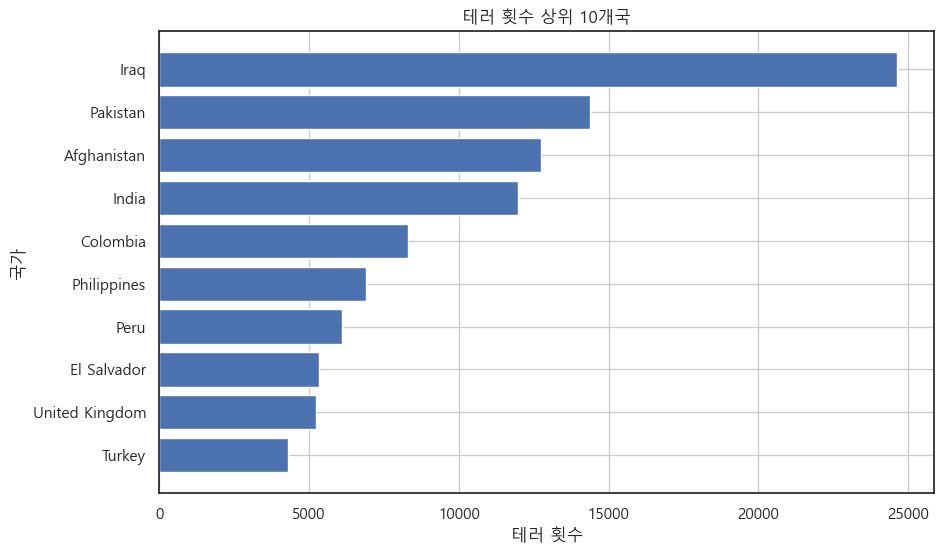

In [8]:
plt.figure(figsize=(10,6))
plt.barh(df_problem2.index, df_problem2['imonth'])
plt.xlabel('테러 횟수')
plt.ylabel('국가')
plt.title('테러 횟수 상위 10개국')
plt.grid()
plt.show()

#### 문제 3. 2번 문제에 대해 사망자 수, 부상자 수 구분하여 시각화

In [9]:
# 데이터프레임 준비

df_problem3 = df_test.pivot_table(
    index = 'country_txt',
    values = ['nkill', 'nwound'],
    aggfunc= [np.sum],
    fill_value=0
)
df_problem3['count'] = df_problem2_count['imonth'] # 테러 횟수 열 추가
df_problem3 = df_problem3.sort_values('count', ascending=False).iloc[:10]
df_problem3.sort_values('count', ascending=True, inplace=True)
df_problem3

sum          count
                nkill  nwound       
country_txt                         
Turkey           6888    9899   4292
United Kingdom   3410    6106   5235
El Salvador     12053    5062   5320
Peru            12771    4078   6096
Philippines      9559   13367   6908
Colombia        14698   10328   8306
India           19341   28980  11960
Afghanistan     39384   44277  12731
Pakistan        23822   42038  14368
Iraq            78589  134690  24636

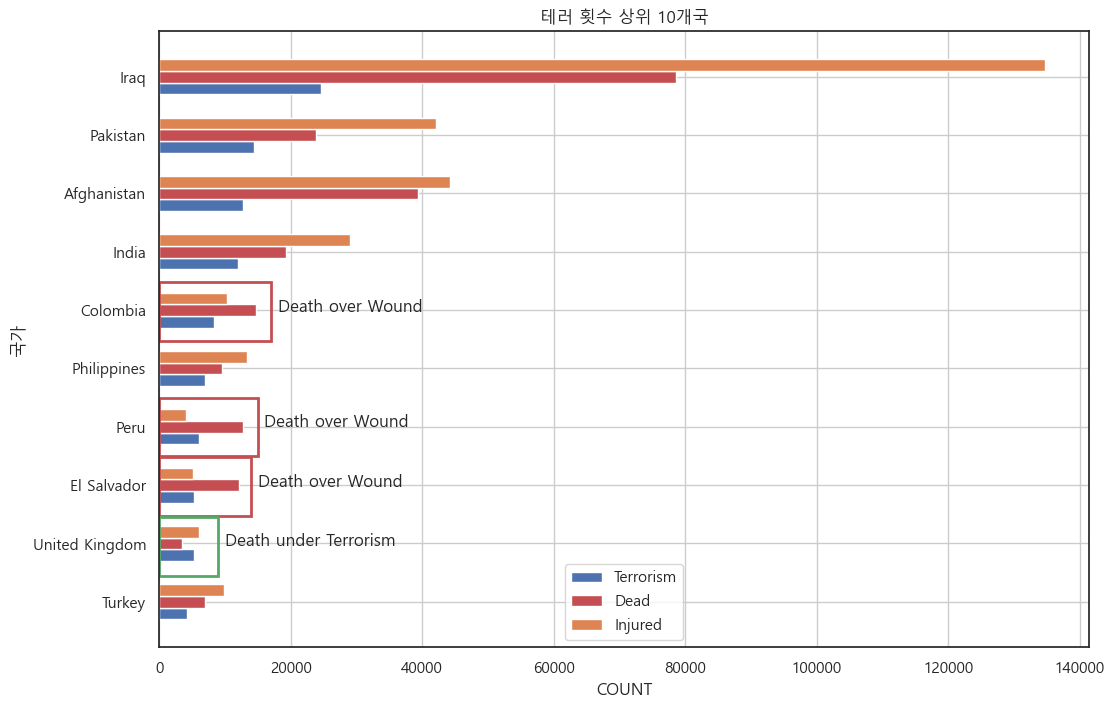

In [10]:
import matplotlib.patches as patches

x1 = range(1, 41, 4)
x2 = [i + 0.8 for i in x1]
x3 = [i + 1.6 for i in x1]

plt.figure(figsize=(12,8))
plt.barh(x1, df_problem3['count'], color = 'b', label = 'Terrorism')  # 테러 횟수
plt.barh(x2, df_problem3['sum', 'nkill'], color = 'r', label = 'Dead')  # 사망자 수
plt.barh(x3, df_problem3['sum', 'nwound'], color = 'C1', label = 'Injured')  # 부상자 수
plt.legend(loc = 'lower center')  # 그래프 범례 표시 >> 각 그래프 명령에 label이 들어가 있어야 표현 됨.
plt.yticks(x2, df_problem3.index)  # 각 국 이름 라벨링


# 특징 있는 자료 표시
rect1 = patches.Rectangle((0, 19.7), 17000, 4, linewidth=2, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((0, 11.8), 15000, 4, linewidth=2, edgecolor='r', facecolor='none')
rect3 = patches.Rectangle((0, 7.7), 14000, 4, linewidth=2, edgecolor='r', facecolor='none')
rect4 = patches.Rectangle((0, 3.6), 9000, 4, linewidth=2, edgecolor='g', facecolor='none')
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
plt.text(18000, 21.7, 'Death over Wound')
plt.text(16000, 13.8, 'Death over Wound')
plt.text(15000, 9.7, 'Death over Wound')
plt.text(10000, 5.6, 'Death under Terrorism')


plt.xlabel('COUNT')
plt.ylabel('국가')
plt.title('테러 횟수 상위 10개국')
plt.grid()
plt.show()

* 부상자가 사망자보다 많은 나라
  - 이라크, 파키스탄, 아프가니스탄, 인도, 필리핀, 영국, 터키

<br>

* 사망자가 부상자보다 많은 나라
  - 콜롬비아, 페루, 엘 살바도르

<br>

* 테러 횟수보다 사망자가 적은 나라
  - 영국

#### 문제 4. 지역 구분으로 테러 공격형태, 사망자, 사상자 수 등에 대해 특성 확인

* 지역 구분
  - 중동 & 북아프리카
  - 남아시아
  - 남아메리카
  - 서유럽
  - 남동아시아
  - 동유럽
  - 북아메리카
  - 동아시아

In [11]:
# 문제에서 요구하지 않는 지역의 행 제거

df_test2 = df_test.drop(df_test[df_test['region_txt'] == 'Central Asia'].index)
df_test2 = df_test2.drop(df_test2[df_test2['region_txt'] == 'Sub-Saharan Africa'].index)
df_test2 = df_test2.drop(df_test2[df_test2['region_txt'] == 'Central America & Caribbean'].index)
df_test2 = df_test2.drop(df_test2[df_test2['region_txt'] == 'Australasia & Oceania'].index)
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152952 entries, 1 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             152952 non-null  int64  
 1   imonth            152952 non-null  int64  
 2   iday              152952 non-null  int64  
 3   country           152952 non-null  int64  
 4   country_txt       152952 non-null  object 
 5   region            152952 non-null  int64  
 6   region_txt        152952 non-null  object 
 7   attacktype1       152952 non-null  int64  
 8   attacktype1_txt   152952 non-null  object 
 9   nkill             146584 non-null  float64
 10  nwound            142239 non-null  float64
 11  targtype1         152952 non-null  int64  
 12  targtype1_txt     152952 non-null  object 
 13  targsubtype1_txt  143563 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 17.5+ MB


In [12]:
# 그래프 그리기 위해 사망자 / 부상자 관련 테이블 생성

df_test2.rename(columns={'attacktype1_txt': 'Attack_Type', 'region_txt': 'Region', 'nkill': 'Death', 'nwound':'Injured'}, inplace=True)


# 지역, 테러형태, 사망자 수 데이터프레임
df_problem4_1 = df_test2.pivot_table(
    index = ['Attack_Type', 'Region'],
    values = 'Death',
    aggfunc= [np.sum],
    fill_value=0
)

df_problem4_1 = df_problem4_1.droplevel(0, axis=1)

# 지역, 테러형태, 부상자 수 데이터프레임
df_problem4_2 = df_test2.pivot_table(
    index = ['Attack_Type', 'Region'],
    values = 'Injured',
    aggfunc= [np.sum],
    fill_value=0
)

df_problem4_2 = df_problem4_2.droplevel(0, axis=1)

In [13]:
# 데이터 프레임 확인
df_problem4_1

Death
Attack_Type   Region                           
Armed Assault East Asia                     612
              Eastern Europe               2046
              Middle East & North Africa  26201
              North America                 837
              South America               16814
...                                         ...
Unknown       North America                  10
              South America                2044
              South Asia                   8211
              Southeast Asia               1276
              Western Europe                 30

[72 rows x 1 columns]

<Axes: title={'center': '지역 별 테러 행위에 따른 부상자 수'}, xlabel='Attack_Type'>

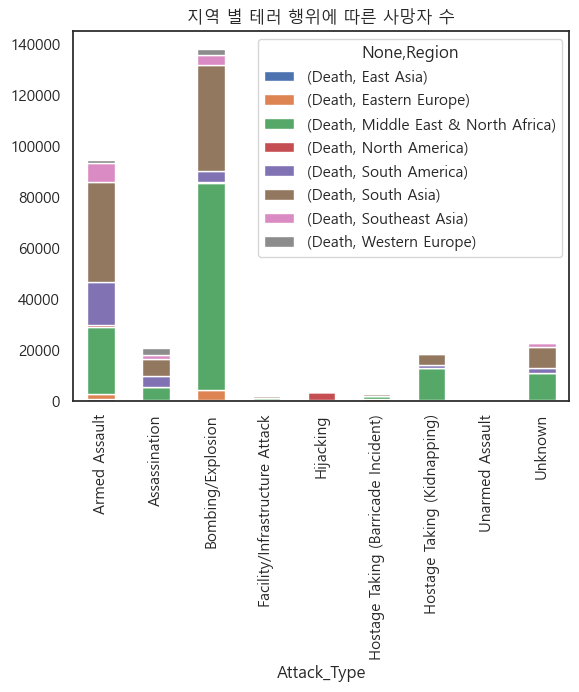

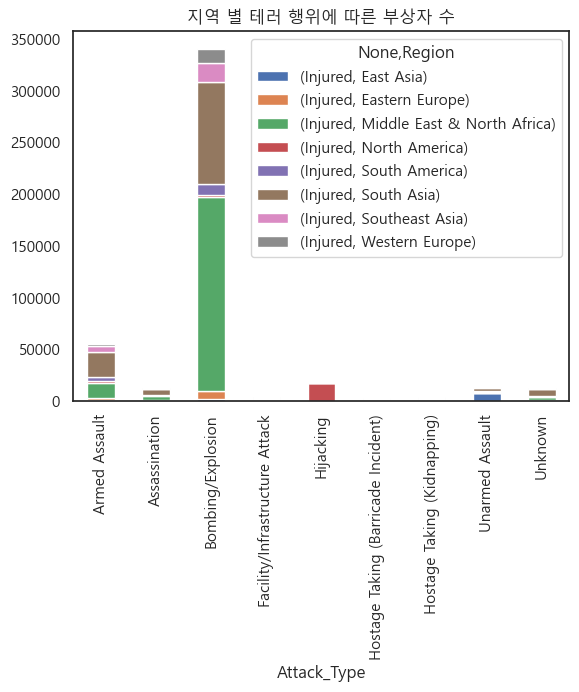

In [14]:
# 표 생성

df_problem4_1.unstack().plot(kind='bar', stacked=True, title= '지역 별 테러 행위에 따른 사망자 수')
df_problem4_2.unstack().plot(kind='bar', stacked=True, title= '지역 별 테러 행위에 따른 부상자 수')

1. 중동 & 북아프리카, 남아시아에서 대다수의 사상자가 발생하는 것을 알 수 있음
2. 중동 & 북아프리카 지역은 폭파 테러에 의한 사망자, 부상자 비율이 압도적으로 높음
   * 뿐만 아니라 대부분의 지역보다 다양한 테러의 사상자가 많음.
3. 무장테러나 암살테러는 남아시아의 비율이 가장 높음
4. 북아메리카는 항공기 보유대수가 많은만큼 항공기불법탈취 테러가 주요 테러인 것을 알 수 있음
5. 총기 및 무기 규제가 비교적 심한 동아시아는 비무장 테러 비율이 높음

#### 문제 5. 4번 문제에 대해 1번 문제에서 특정 지은 시기를 기준으로 분리하여 테러 양상 분석

In [15]:
# 2011년도 기준으로 두 개의 데이터 프레임을 만들고 각 데이터 프레임을 다시 사망자/부상자 데이터 프레임으로 만들어 표 생성

df_test3_after = df_test2.drop(df_test2[df_test2['iyear'] <= 2011].index)
df_test3_before = df_test2.drop(df_test2[df_test2['iyear'] > 2011].index)

df_test3_before.tail()

,iyear,imonth,iday,country,country_txt,region,Region,attacktype1,Attack_Type,Death,Injured,targtype1,targtype1_txt,targsubtype1_txt
104773,2011,12,31,95,Iraq,10,Middle East & North Africa,2,Armed Assault,5.0,0.0,17,Terrorists/Non-State Militia,Non-State Militia
104774,2011,12,31,153,Pakistan,6,South Asia,3,Bombing/Explosion,2.0,13.0,14,Private Citizens & Property,Unnamed Civilian/Unspecified
104775,2011,12,31,95,Iraq,10,Middle East & North Africa,3,Bombing/Explosion,0.0,1.0,14,Private Citizens & Property,Unnamed Civilian/Unspecified
104776,2011,12,31,153,Pakistan,6,South Asia,3,Bombing/Explosion,2.0,NaN,4,Military,"Military Personnel (soldiers, troops, officers..."
104777,2011,12,31,153,Pakistan,6,South Asia,3,Bombing/Explosion,2.0,4.0,14,Private Citizens & Property,Named Civilian


<Axes: title={'center': '2011년 이전 지역 별 테러 행위에 따른 부상자 수'}, xlabel='Attack_Type'>

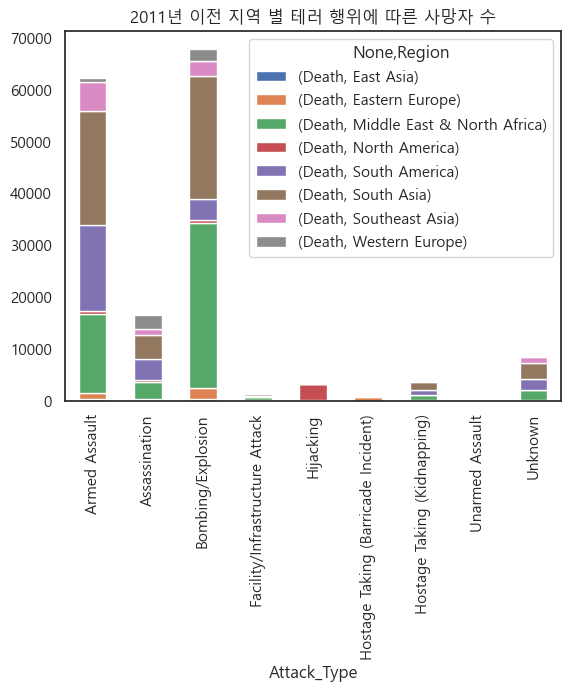

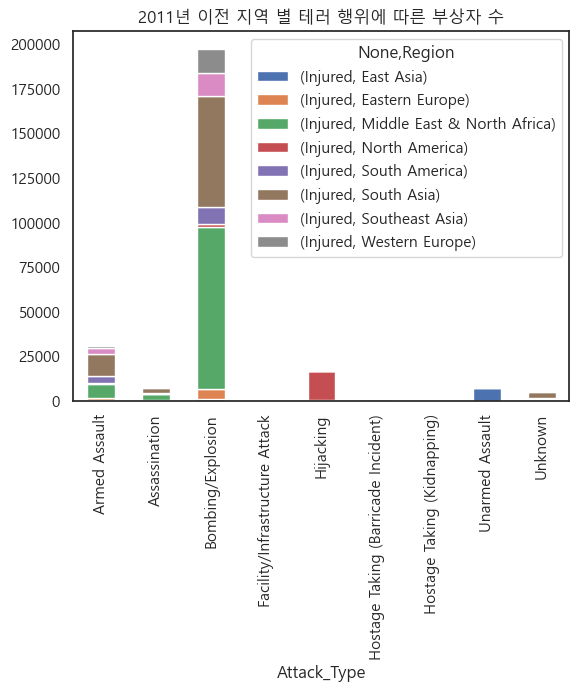

In [16]:
# 2011년도 이전 테러 관련 데이터프레임 생성 및 그래프 생성
# 지역, 테러형태, 사망자 수 데이터프레임
df_problem5_1 = df_test3_before.pivot_table(
    index = ['Attack_Type', 'Region'],
    values = 'Death',
    aggfunc= [np.sum],
    fill_value=0
)

df_problem5_1 = df_problem5_1.droplevel(0, axis=1)

# 지역, 테러형태, 부상자 수 데이터프레임
df_problem5_2 = df_test3_before.pivot_table(
    index = ['Attack_Type', 'Region'],
    values = 'Injured',
    aggfunc= [np.sum],
    fill_value=0
)

df_problem5_2 = df_problem5_2.droplevel(0, axis=1)


# 표 생성
df_problem5_1.unstack().plot(kind='bar', stacked=True, title= '2011년 이전 지역 별 테러 행위에 따른 사망자 수')
df_problem5_2.unstack().plot(kind='bar', stacked=True, title= '2011년 이전 지역 별 테러 행위에 따른 부상자 수')

<Axes: title={'center': '2011년 이후 지역 별 테러 행위에 따른 부상자 수'}, xlabel='Attack_Type'>

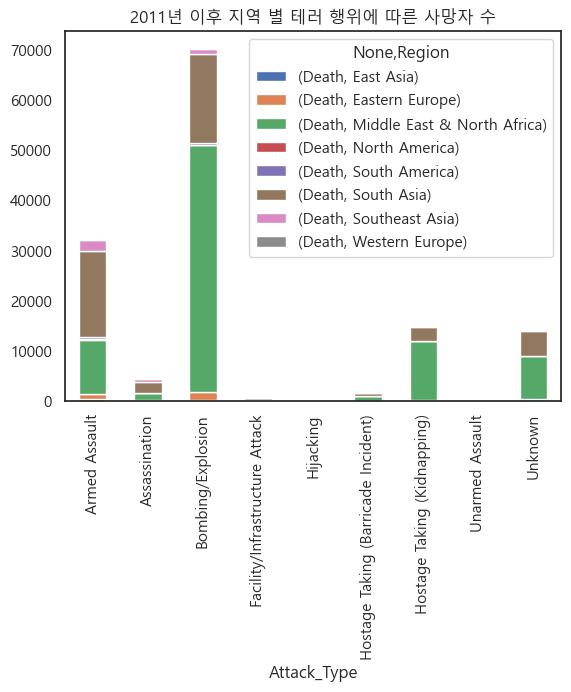

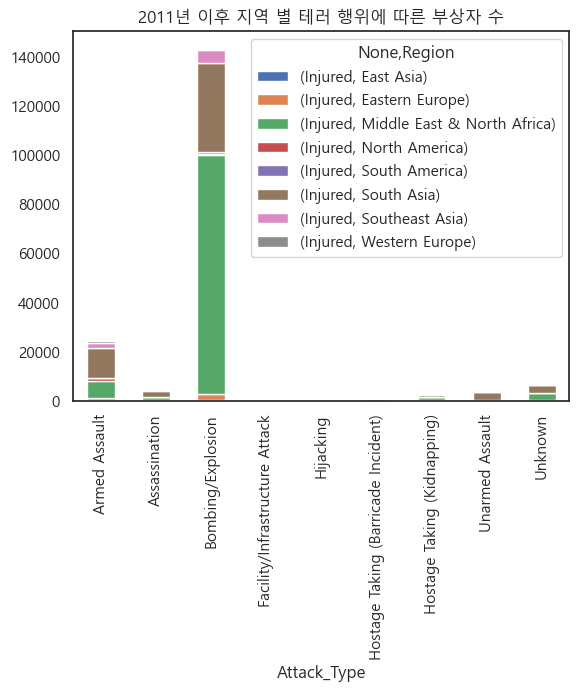

In [17]:
# 2011년도 이후 테러 관련 데이터프레임 생성 및 그래프 생성
# 지역, 테러형태, 사망자 수 데이터프레임
df_problem5_3 = df_test3_after.pivot_table(
    index = ['Attack_Type', 'Region'],
    values = 'Death',
    aggfunc= [np.sum],
    fill_value=0
)

df_problem5_3 = df_problem5_3.droplevel(0, axis=1)

# 지역, 테러형태, 부상자 수 데이터프레임
df_problem5_4 = df_test3_after.pivot_table(
    index = ['Attack_Type', 'Region'],
    values = 'Injured',
    aggfunc= [np.sum],
    fill_value=0
)

df_problem5_4 = df_problem5_4.droplevel(0, axis=1)


# 표 생성
df_problem5_3.unstack().plot(kind='bar', stacked=True, title= '2011년 이후 지역 별 테러 행위에 따른 사망자 수')
df_problem5_4.unstack().plot(kind='bar', stacked=True, title= '2011년 이후 지역 별 테러 행위에 따른 부상자 수')

1. 4번 문제 해석 결과의 대부분은 2011년 이전 테러 양상과 일치함
2. 2011년 이후 대부분의 지역에서 테러 사상자가 감소하였음 (특히 남아메리카가 가장 높은 감소율을 보여줌)
   * 중동&북아프리카, 남아시아, 동남아를 제외하면 테러로 인한 사상자는 없다고 봐도 무방
   * 물론 2011년 이후의 기간이 이전 기간 조회에 비해 전체 양이 적어 상대적으로 없는 것처럼 보이는 것일 수도 있음
3. 중동&북아프리카는 폭탄 테러 및 무장테러, 납치, 원인불명의 테러에 의한 사상자가 극도로 높아졌음
   * 1970~2011, 41년 간의 폭탄 테러 사망자보다 2012~2017, 6년 간의 폭탄 테러 사망자가 약 2배 높음

- 기타 사항
  * 비율을 계산하여 데이터프레임에 추가하는 등을 통하면 한 눈에 보기 쉽게 그래프 만들 수 있을 것으로 보임
  * 특정 시기 기준으로 분리되어 해당 시기 전 후의 기간 차이가 큼 (41년 vs 6년) 그러므로 직관적인 비교를 위해 햇수에 의한 normalize가 들어가면 좋을 것 같음.

#### 문제 6. 지역별 > 연도별 (70년대, 80년대, 90년대, 00년대, 10년대)로 구분하여 특성 분석

In [18]:
# df_test2 데이터프레임을 불러와서 연도 수정 (1970~1979는 1970, 이런식으로), 이후 지역별/연도별 묶어서 구분

df_test2 = df_test.drop(df_test[df_test['region_txt'] == 'Central Asia'].index)
df_test2 = df_test2.drop(df_test2[df_test2['region_txt'] == 'Sub-Saharan Africa'].index)
df_test2 = df_test2.drop(df_test2[df_test2['region_txt'] == 'Central America & Caribbean'].index)
df_test2 = df_test2.drop(df_test2[df_test2['region_txt'] == 'Australasia & Oceania'].index)

df_test2.rename(columns={'attacktype1_txt': 'Attack_Type', 'region_txt': 'Region', 'nkill': 'Death', 'nwound':'Injured'}, inplace=True)

df_test4 = df_test2.replace({'iyear':[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]}, 1970)
df_test4 = df_test4.replace({'iyear':[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]}, 1980)
df_test4 = df_test4.replace({'iyear':[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]}, 1990)
df_test4 = df_test4.replace({'iyear':[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]}, 2000)
df_test4 = df_test4.replace({'iyear':[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]}, 2010)
df_test4 = df_test4.fillna(0)
df_test4.tail()

,iyear,imonth,iday,country,country_txt,region,Region,attacktype1,Attack_Type,Death,Injured,targtype1,targtype1_txt,targsubtype1_txt
181685,2010,12,31,4,Afghanistan,6,South Asia,3,Bombing/Explosion,0.0,4.0,1,Business,Retail/Grocery/Bakery
181687,2010,12,31,200,Syria,10,Middle East & North Africa,3,Bombing/Explosion,2.0,7.0,4,Military,Military Barracks/Base/Headquarters/Checkpost
181688,2010,12,31,160,Philippines,5,Southeast Asia,7,Facility/Infrastructure Attack,0.0,0.0,14,Private Citizens & Property,House/Apartment/Residence
181689,2010,12,31,92,India,6,South Asia,3,Bombing/Explosion,0.0,0.0,2,Government (General),Government Building/Facility/Office
181690,2010,12,31,160,Philippines,5,Southeast Asia,3,Bombing/Explosion,0.0,0.0,20,Unknown,0


In [19]:
# 사망자, 부상자, 테러 횟수 데이터프레임 생성

df_test4_1 = df_test4.groupby(['Region', 'iyear']).agg({'Death':sum, 'Injured':sum})
df_test4_1['Incidents'] = df_test4.groupby(['Region', 'iyear']).count()['imonth']
df_test4_1

Death   Injured  Incidents
Region                     iyear                              
East Asia                  1970      37.0      65.0         78
                           1980      37.0     126.0        110
                           1990     219.0    7750.0        416
                           2000     253.0     434.0         88
                           2010     606.0     838.0        110
Eastern Europe             1970      33.0      20.0         26
                           1980      16.0      75.0         43
                           1990    1480.0    2128.0       1062
                           2000    2677.0    4908.0       1326
                           2010    3209.0    4914.0       2687
Middle East & North Africa 1970    1314.0    2474.0       1090
                           1980    5264.0   11062.0       2883
                           1990   13689.0   14052.0       5423
                           2000   28906.0   62220.0       8113
                           2010   88469.0  124500.0      32965
North America              1970     268.0     669.0       1596
                           1980     420.0     966.0        558
                           1990     726.0    1283.0        654
                           2000    3110.0   16799.0        270
                           2010     392.0    1814.0        378
South America              1970     647.0     345.0       1009
                           1980   15418.0    5321.0       9698
                           1990    9625.0    6208.0       5763
                           2000    2245.0    2994.0       1149
                           2010     914.0    1836.0       1359
South Asia                 1970     108.0      92.0         51
                           1980    9834.0   10241.0       2871
                           1990   16655.0   23638.0       4840
                           2000   21521.0   37886.0       8026
                           2010   53201.0   69503.0      29186
Southeast Asia             1970     700.0     744.0        194
                           1980    3447.0    3897.0       1086
                           1990    3293.0    3976.0       1643
                           2000    3602.0    8295.0       2707
                           2010    4595.0    9347.0       6855
Western Europe             1970    2648.0    2845.0       4694
                           1980    2259.0    6117.0       4767
                           1990     791.0    3478.0       3978
                           2000     393.0    3688.0       1406
                           2010     603.0    2204.0       1794

In [20]:
df_test4_1.index

MultiIndex([(                 'East Asia', 1970),
            (                 'East Asia', 1980),
            (                 'East Asia', 1990),
            (                 'East Asia', 2000),
            (                 'East Asia', 2010),
            (            'Eastern Europe', 1970),
            (            'Eastern Europe', 1980),
            (            'Eastern Europe', 1990),
            (            'Eastern Europe', 2000),
            (            'Eastern Europe', 2010),
            ('Middle East & North Africa', 1970),
            ('Middle East & North Africa', 1980),
            ('Middle East & North Africa', 1990),
            ('Middle East & North Africa', 2000),
            ('Middle East & North Africa', 2010),
            (             'North America', 1970),
            (             'North America', 1980),
            (             'North America', 1990),
            (             'North America', 2000),
            (             'North America', 2010),


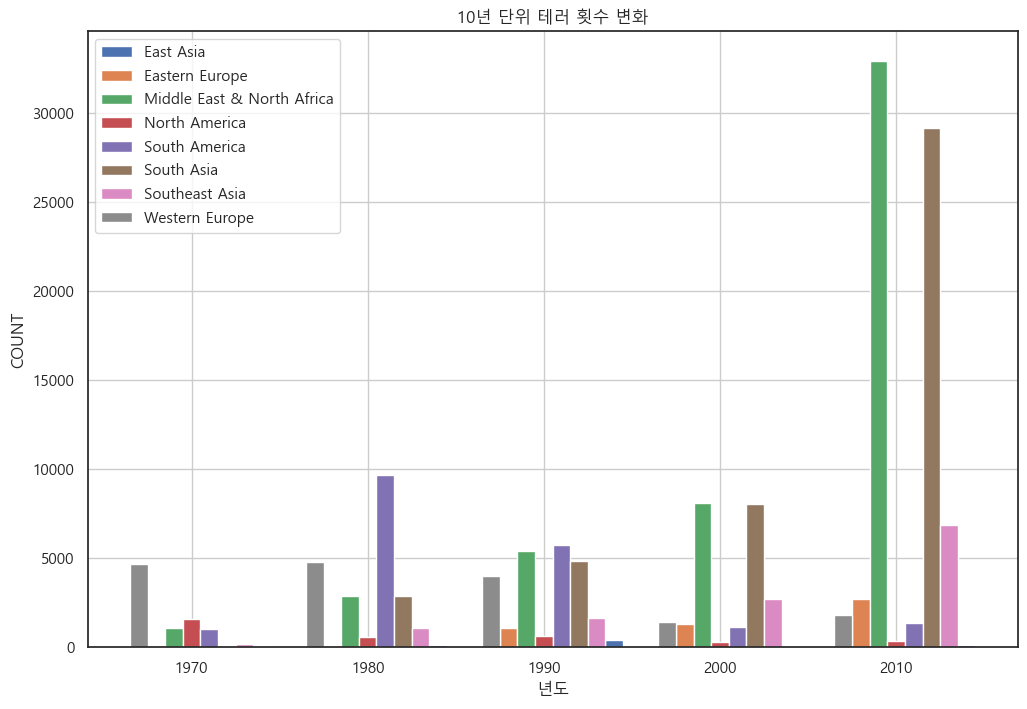

In [21]:
# 자료 시각화

x1 = range(1, 41, 8)
x2 = [i + 0.8 for i in x1]
x3 = [i + 1.6 for i in x1]
x4 = [i + 2.4 for i in x1]
x5 = [i + 3.2 for i in x1]
x6 = [i + 4.0 for i in x1]
x7 = [i + 4.8 for i in x1]
x8 = [i + 5.6 for i in x1]


plt.figure(figsize=(12,8))
plt.bar(x8, df_test4_1.loc['East Asia']['Incidents'], color = 'C0', label = 'East Asia')  # 테러 횟수
plt.bar(x2, df_test4_1.loc['Eastern Europe']['Incidents'], color = 'C1', label = 'Eastern Europe')
plt.bar(x3, df_test4_1.loc['Middle East & North Africa']['Incidents'], color = 'C2', label = 'Middle East & North Africa')
plt.bar(x4, df_test4_1.loc['North America']['Incidents'], color = 'C3', label = 'North America')
plt.bar(x5, df_test4_1.loc['South America']['Incidents'], color = 'C4', label = 'South America')
plt.bar(x6, df_test4_1.loc['South Asia']['Incidents'], color = 'C5', label = 'South Asia')
plt.bar(x7, df_test4_1.loc['Southeast Asia']['Incidents'], color = 'C6', label = 'Southeast Asia')
plt.bar(x1, df_test4_1.loc['Western Europe']['Incidents'], color = 'C7', label = 'Western Europe')


plt.legend()  # 그래프 범례 표시 >> 각 그래프 명령에 label이 들어가 있어야 표현 됨.
plt.xticks(x4, [1970, 1980, 1990, 2000, 2010])  # 년도 라벨링


plt.xlabel('년도')
plt.ylabel('COUNT')
plt.title('10년 단위 테러 횟수 변화')
plt.grid()
plt.show()

1. 시간에 따라 테러 횟수가 증가하는 지역
   - 중동 & 북아프리카
   - 남아시아
   - 동남아시아
   - 동유럽

2. 시간이 지남에 따라 테러 횟수가 감소하는 지역
   - 북아메리카
   - 남아메리카
   - 서유럽

3. 특이 지역
   - 동아시아 (1990년대 잠시 증가한 테러 이외 대부분 적게 발생)

#### 문제 7. 우리나라의 테러를 집계해서 시각화 및 분석

In [22]:
# 기존 데이터 프레임 재 확인
df_test2.head()

,iyear,imonth,iday,country,country_txt,region,Region,attacktype1,Attack_Type,Death,Injured,targtype1,targtype1_txt,targsubtype1_txt
1,1970,0,0,130,Mexico,1,North America,6,Hostage Taking (Kidnapping),0.0,0.0,7,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,160,Philippines,5,Southeast Asia,1,Assassination,1.0,0.0,10,Journalists & Media,Radio Journalist/Staff/Facility
3,1970,1,0,78,Greece,8,Western Europe,3,Bombing/Explosion,NaN,NaN,7,Government (Diplomatic),Embassy/Consulate
4,1970,1,0,101,Japan,4,East Asia,7,Facility/Infrastructure Attack,NaN,NaN,7,Government (Diplomatic),Embassy/Consulate
5,1970,1,1,217,United States,1,North America,2,Armed Assault,0.0,0.0,3,Police,"Police Building (headquarters, station, school)"


In [25]:
# 한국만 추출
df_korea = df_test2[df_test2['country_txt']== 'South Korea']
df_korea['Incidents'] = 1
df_korea

C:\Users\User\AppData\Local\Temp\ipykernel_6572\2242017319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_korea['Incidents'] = 1


,iyear,imonth,iday,country,country_txt,region,Region,attacktype1,Attack_Type,Death,Injured,targtype1,targtype1_txt,targsubtype1_txt,Incidents
2514,1974,8,15,184,South Korea,4,East Asia,1,Assassination,1.0,0.0,2,Government (General),Head of State,1
15734,1982,3,18,184,South Korea,4,East Asia,7,Facility/Infrastructure Attack,1.0,3.0,7,Government (Diplomatic),Embassy/Consulate,1
19820,1983,9,22,184,South Korea,4,East Asia,3,Bombing/Explosion,1.0,4.0,7,Government (Diplomatic),Embassy/Consulate,1
29151,1986,9,14,184,South Korea,4,East Asia,3,Bombing/Explosion,5.0,19.0,6,Airports & Aircraft,Airport,1
29696,1986,12,15,184,South Korea,4,East Asia,2,Armed Assault,0.0,11.0,2,Government (General),Government Building/Facility/Office,1
33678,1988,3,4,184,South Korea,4,East Asia,3,Bombing/Explosion,0.0,0.0,1,Business,Retail/Grocery/Bakery,1
33835,1988,3,18,184,South Korea,4,East Asia,7,Facility/Infrastructure Attack,0.0,0.0,4,Military,Military Unit/Patrol/Convoy,1
34532,1988,5,23,184,South Korea,4,East Asia,7,Facility/Infrastructure Attack,0.0,0.0,7,Government (Diplomatic),Embassy/Consulate,1
34562,1988,5,26,184,South Korea,4,East Asia,7,Facility/Infrastructure Attack,0.0,0.0,1,Business,Bank/Commerce,1
34737,1988,6,13,184,South Korea,4,East Asia,7,Facility/Infrastructure Attack,0.0,0.0,7,Government (Diplomatic),Embassy/Consulate,1


In [27]:
# 필요한 정보만 합계 등으로 추출

df_korea_1 = df_korea.groupby('iyear').agg({'Death':sum, 'Injured':sum, 'Incidents':sum})
df_korea_1

,Death,Injured,Incidents
iyear,,,
1974,1.0,0.0,1
1982,1.0,3.0,1
1983,1.0,4.0,1
1986,5.0,30.0,2
1988,0.0,0.0,8
1989,0.0,0.0,1
1990,0.0,1.0,3
1991,0.0,0.0,6
1992,1.0,0.0,3


In [30]:
df_korea_1.index

Int64Index([1974, 1982, 1983, 1986, 1988, 1989, 1990, 1991, 1992, 1994, 1995,
            1996, 2001, 2003, 2006, 2015, 2016],
           dtype='int64', name='iyear')

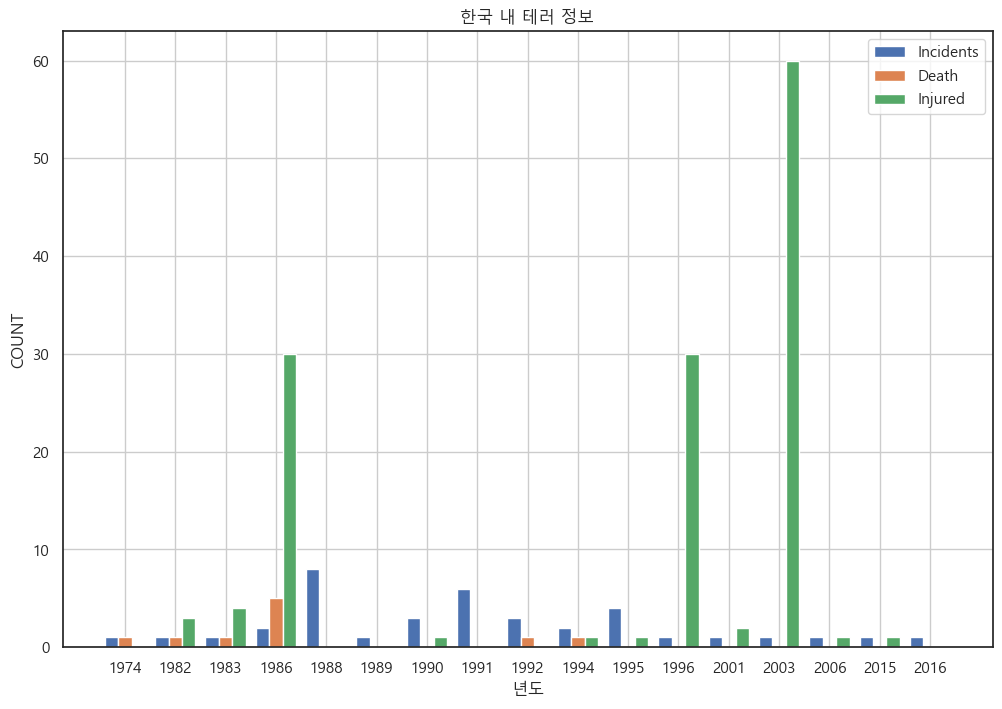

In [34]:
# 자료 시각화

x1 = range(1, 51, 3)
x2 = [i + 0.8 for i in x1]
x3 = [i + 1.6 for i in x1]


plt.figure(figsize=(12,8))
plt.bar(x1, df_korea_1['Incidents'], color = 'C0', label = 'Incidents')  # 테러 횟수
plt.bar(x2, df_korea_1['Death'], color = 'C1', label = 'Death')  # 테러 횟수
plt.bar(x3, df_korea_1['Injured'], color = 'C2', label = 'Injured')  # 테러 횟수


plt.legend()  # 그래프 범례 표시 >> 각 그래프 명령에 label이 들어가 있어야 표현 됨.
plt.xticks(x2, df_korea_1.index)  # 년도 라벨링


plt.xlabel('년도')
plt.ylabel('COUNT')
plt.title('한국 내 테러 정보')
plt.grid()
plt.show()

1. 80년대 후반까지 지속 테러 빈도가 늘어나다가 90년대 이후 줄어들기 시작함
2. 테러로 인한 사망자도 테러 빈도수와 비슷한 경향을 보임
3. 유럽에 비해 폭력적이지 않은 시위, 강한 무기 규제 등으로 인해 테러로 야기되는 피해가 대체로 크지 않음을 알 수 있음

#### 문제 8. 테러의 무서운 면을 강조할 방법을 고민하여 데이터 분석 및 시각화로 제시

In [36]:
# 우리나라 출생아 수와 전 세계 테러로 인한 사망자 수 비교, 우리나라 출생아 수 데이터프레임 만들기
# 출처: e-나라지표, 합계 출산율 - 출생아 수

year = [i for i in range(1970, 2018)]
df_korea_nb = pd.DataFrame({'iyear': year, 'birth': [1007000, 1025000, 953000, 966000, 923000, 874000, 796000, 825000, 751000, 863000, 863000,
                                                     867000, 848000, 769000, 675000, 655000, 636000, 624000, 633000, 639000, 650000, 709000, 731000,
                                                     716000, 721000, 715000, 691000, 675000, 641000, 620000, 640000, 559000, 496000, 495000, 477000,
                                                     438000, 451000, 496000, 465000, 444000, 470000, 471000, 484000, 436000, 435000, 438000, 406000,
                                                     357000]})
df_korea_nb.tail()

,iyear,birth
43,2013,436000
44,2014,435000
45,2015,438000
46,2016,406000
47,2017,357000


In [43]:
# 테러 데이터프레임 이용하여 사망자 수 합계 만들기

df_problem8 = df_test.groupby(['iyear']).agg({'nkill':sum, 'nwound':sum})
df_problem8['Casualties'] = df_problem8.sum(axis=1)
df_problem8

,nkill,nwound,Casualties
iyear,,,
1970,174.0,212.0,386.0
1971,173.0,82.0,255.0
1972,566.0,409.0,975.0
1973,370.0,495.0,865.0
1974,539.0,865.0,1404.0
1975,617.0,617.0,1234.0
1976,674.0,756.0,1430.0
1977,456.0,518.0,974.0
1978,1459.0,1600.0,3059.0


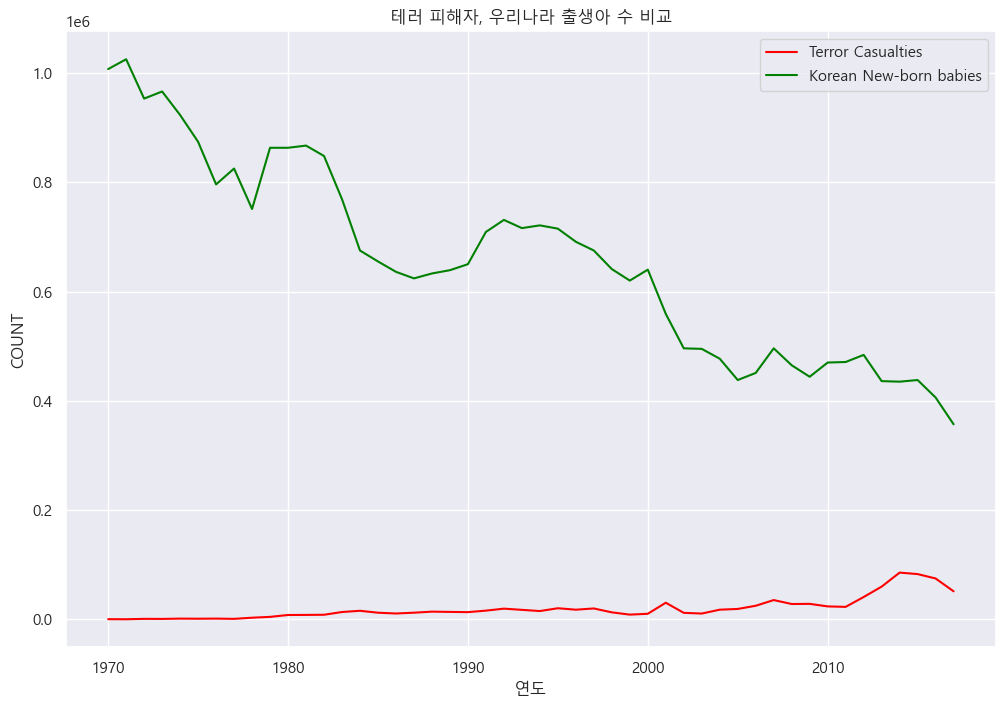

In [52]:
plt.figure(figsize=(12,8))
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='dark')
plt.plot(df_problem8.index, df_problem8['Casualties'], color = 'red', label = 'Terror Casualties')
plt.plot(df_korea_nb['iyear'], df_korea_nb['birth'], color = 'green', label = 'Korean New-born babies')
plt.xlabel('연도')
plt.ylabel('COUNT')
plt.title('테러 피해자, 우리나라 출생아 수 비교')
plt.legend()
plt.grid()
plt.show()

1. 테러로 인해 금전적인 피해도 어마어마하겠지만, 사상자가 생기는것 만큼 두려운 것은 없을 것임
2. 비율로 보았을 때 우리나라 신생아 수가 전 세계 테러에 의한 사상자의 약 10배 정도 차이가 난다.
   - 테러로 인해 매년 우리나라 신생아 수 10명당 1명 꼴로 사망하는 것과 같다고 비유하면 좀 더 와닿지 않을까 싶었음.
3. 현재 전쟁 및 고조되는 세계적 긴장감, 저출산율 등을 살펴보았을 때, 테러로 인한 사상자가 출산율을 뛰어 넘는 순간도 올 수 있을 것이라 생각됨.